# I. Thư viện

In [3]:
import pandas as pd
import numpy as np
from itertools import groupby
import matplotlib.pyplot as plt

# II. Đọc dữ liệu

In [4]:
origin_df = pd.read_csv('data.csv')
origin_df.head()

,IMDb,IMDb_votes,director,nations,duration,quality,resolution,language,genres,company,vietnamese_name,name,year,id,star,recommendations,film_content,actors,relase
0,7.0,2828.0,"Joel Crawford,","Mỹ,",95.0,Bản đẹp,Full HD,Phụ đề Việt,"Phim viễn tưởng, Phim phiêu lưu, Phim hài hước...",DreamWorks Animation,Gia Đình Croods: Kỷ Nguyên Mới,The Croods: A New Age,2020,11980,0.00,"['88', '9468', '3389', '11290', '1']",Sinh tồn trong một thế giới tiền sử luôn rình ...,"Nicolas Cage, Emma Stone, Ryan Reynolds, Cathe...",NaN
1,8.2,3065.0,"Tomm Moore, Ross Stewart,","Mỹ, Pháp, Anh, Luxembourg, Denmark, Ireland,",103.0,Bản đẹp,Full HD,Phụ đề Việt,"Phim viễn tưởng, Phim phiêu lưu, Phim gia đình...","Apple Original Films, Cartoon Saloon, Mélusine...",Sói Lang Thang,WolfWalkers,2020,11977,0.00,"['3021', '11115', '10682', '2674', '9923', '25...",Trong một thời kỳ nơi tồn tại đầy dẫy ma thuật...,"Honor Kneafsey, Sean Bean, Simon Mcburney, Mar...",30/10/2020
2,4.3,166.0,"Liming Li,","Trung Quốc,",84.0,Bản đẹp,HD 720p,Thuyết minh,"Phim hành động, Phim võ thuật, Phim hồi hộp-Gâ...",Chưa rõ,Diệp Vấn: Bậc Thầy Võ Thuật,Ip Man: Kung Fu Master,2019,11979,6.03,"['3629', '1204', '9551', '4582', '1', '2']",IP MAN: KUNG FU MASTER quay trở lại những ngày...,"Yu-Hang To, Michael Wong, Wanliruo Xin, Dongfe...",23/12/2019
3,6.2,9881.0,"Ryan Murphy,","Mỹ,",130.0,Bản đẹp,Full HD,Phụ đề Việt,"Phim hài hước, Phim tâm lý, Phim chính kịch - ...","Dramatic Forces, Storykey, Netflix",Vũ Hội Tốt Nghiệp,The Prom,2020,11978,6.11,"['4473', '8663', '9283', '2818', '11302', '11']",Nhóm sao Broadway đang lúc kém vận làm đảo lộn...,"Meryl Streep, James Corden, Nicole Kidman, Ker...",11/12/2020
4,5.8,69.0,"Ming-Lang Chen,","Đài Loan,",92.0,Bản đẹp,Full HD,Phụ đề Việt,"Phim tình cảm-Lãng mạn, Phim chính kịch - Dram...",Swallow Wings,Tâm Hồn Yêu Thương,The Teacher (My Soul Is Made Of Love),2019,11908,5.86,"['6182', '6372', '11889', '5965', '22']","Kevin, một giáo viên Giáo dục công dân 26 tuổi...","Oscar Chiu, Chin-Hao Chang, Tzu-Hua Ho, Winnie...",6/12/2019


In [5]:
# make a copy
df = origin_df.copy()
df.head()

,IMDb,IMDb_votes,director,nations,duration,quality,resolution,language,genres,company,vietnamese_name,name,year,id,star,recommendations,film_content,actors,relase
0,7.0,2828.0,"Joel Crawford,","Mỹ,",95.0,Bản đẹp,Full HD,Phụ đề Việt,"Phim viễn tưởng, Phim phiêu lưu, Phim hài hước...",DreamWorks Animation,Gia Đình Croods: Kỷ Nguyên Mới,The Croods: A New Age,2020,11980,0.00,"['88', '9468', '3389', '11290', '1']",Sinh tồn trong một thế giới tiền sử luôn rình ...,"Nicolas Cage, Emma Stone, Ryan Reynolds, Cathe...",NaN
1,8.2,3065.0,"Tomm Moore, Ross Stewart,","Mỹ, Pháp, Anh, Luxembourg, Denmark, Ireland,",103.0,Bản đẹp,Full HD,Phụ đề Việt,"Phim viễn tưởng, Phim phiêu lưu, Phim gia đình...","Apple Original Films, Cartoon Saloon, Mélusine...",Sói Lang Thang,WolfWalkers,2020,11977,0.00,"['3021', '11115', '10682', '2674', '9923', '25...",Trong một thời kỳ nơi tồn tại đầy dẫy ma thuật...,"Honor Kneafsey, Sean Bean, Simon Mcburney, Mar...",30/10/2020
2,4.3,166.0,"Liming Li,","Trung Quốc,",84.0,Bản đẹp,HD 720p,Thuyết minh,"Phim hành động, Phim võ thuật, Phim hồi hộp-Gâ...",Chưa rõ,Diệp Vấn: Bậc Thầy Võ Thuật,Ip Man: Kung Fu Master,2019,11979,6.03,"['3629', '1204', '9551', '4582', '1', '2']",IP MAN: KUNG FU MASTER quay trở lại những ngày...,"Yu-Hang To, Michael Wong, Wanliruo Xin, Dongfe...",23/12/2019
3,6.2,9881.0,"Ryan Murphy,","Mỹ,",130.0,Bản đẹp,Full HD,Phụ đề Việt,"Phim hài hước, Phim tâm lý, Phim chính kịch - ...","Dramatic Forces, Storykey, Netflix",Vũ Hội Tốt Nghiệp,The Prom,2020,11978,6.11,"['4473', '8663', '9283', '2818', '11302', '11']",Nhóm sao Broadway đang lúc kém vận làm đảo lộn...,"Meryl Streep, James Corden, Nicole Kidman, Ker...",11/12/2020
4,5.8,69.0,"Ming-Lang Chen,","Đài Loan,",92.0,Bản đẹp,Full HD,Phụ đề Việt,"Phim tình cảm-Lãng mạn, Phim chính kịch - Dram...",Swallow Wings,Tâm Hồn Yêu Thương,The Teacher (My Soul Is Made Of Love),2019,11908,5.86,"['6182', '6372', '11889', '5965', '22']","Kevin, một giáo viên Giáo dục công dân 26 tuổi...","Oscar Chiu, Chin-Hao Chang, Tzu-Hua Ho, Winnie...",6/12/2019


# III. Tìm hiểu dữ liệu

## 1. Tổng quan

Tổng quan về dữ liệu:
- Dữ liệu được crawl từ trang http://www.phimmoizz.net/ nhằm mục đích phục vụ học tập. Dữ liệu crawl được là HTML, có sử dụng async để chạy javascript của trang web để có thể lấy được toàn bộ dữ liệu.
- Ý tưởng sử dụng dữ liệu: 
    + Phân tích: đặt câu hỏi và trả lời câu hỏi bằng các hàm cung cấp bới pandas, numpy và các thư viện hỗ trợ trực quan hóa dữ liệu (EDA))
    + Ứng dụng ML và AI: sử dụng ......

In [6]:
len(df)

5939

In [7]:
df.isna().sum()

IMDb                809
IMDb_votes         1858
director            343
nations               0
duration             90
quality               0
resolution            0
language              0
genres                0
company               0
vietnamese_name       0
name                  0
year                  0
id                    0
star                  0
recommendations       0
film_content          0
actors              187
relase             2298
dtype: int64

In [8]:
df.tail()

,IMDb,IMDb_votes,director,nations,duration,quality,resolution,language,genres,company,vietnamese_name,name,year,id,star,recommendations,film_content,actors,relase
5934,5.9,NaN,"M.l. Pundhevanop Dhewakul,","Thái Lan,",138.0,Bản đẹp,HD 720p,Phụ đề Việt,"Phim tâm lý, Phim lẻ",Sahamongkol Film International,Mẹ Kế: Đoạn Kết,Jan Dara The Finale,2013,152,6.10,"['109', '10876', '8647', '7631', '11', '20']",Phim lấy bối cảnh Thái Lan những năm 1930. Jan...,"Yayaying Rhatha Phongam, Mario Maurer, Nat Tep...",NaN
5935,6.4,NaN,"John Stockwell,","Anh,",90.0,Bản đẹp,HD 720p,Phụ đề Việt,"Phim hành động, Phim chiếu rạp, Phim lẻ",Anchor Bay Films,Kẻ Truy Sát,In the Blood,2014,938,7.33,"['7458', '222', '1842', '220', '221', '398']","Ava, một nữ đấu sĩ lão luyện đã từng có quá kh...","Gina Carano, Luis Guzmán, Amaury Nolasco, Isma...",NaN
5936,6.4,NaN,"Oren Peli,","Mỹ,",86.0,Bản đẹp,HD 720p,Phụ đề Việt,"Phim phiêu lưu, Phim kinh dị, Phim lẻ",Solana Films,Lời Nguyền Bí Ẩn 1,Paranormal Activity 1,2007,1020,5.70,"['11180', '1021', '1022', '1023', '2386', '1']",Paranormal Activity kể về một cặp vợ chồng trẻ...,"Katie Featherston, Micah Sloat, Mark Fredrichs...",NaN
5937,6.1,9359.0,"Fede Alvarez,","Mỹ, Anh, Canada, Đức, Sweden,",117.0,Bản đẹp,Full HD,Phụ đề việt + Thuyết minh,"Phim hành động, Phim hình sự, Phim hồi hộp-Gây...","Metro-Goldwyn-Mayer (MGM), New Regency Picture...",Cô Gái Trong Lưới Nhện Ảo,The Girl in the Spider's Web,2018,7529,7.00,"['3766', '7334', '7598', '3764', '7139', '1']",Được chuyển thể từ loạt tiểu thuyết trinh thám...,"Claire Foy, Lakeith Stanfield, Sylvia Hoeks, S...",NaN
5938,6.4,197.0,"Kim Hyung-Hyub,","Hàn Quốc,",115.0,Bản đẹp,HD 720p,Phụ đề việt + Thuyết minh,"Phim hài hước, Phim gia đình, Phim thuyết minh...",Chưa rõ,"Con là Bố, Bố là Con","Daddy You, Daughter Me / Dad is Daughter",2017,8077,6.97,"['8076', '7439', '9885', '468', '1957', '10']","Do Yeon là một nữ sinh cấp 3 xinh xắn, đáng yê...","Jung So-Min, Yoon Je-Moon, Lee Il-Hwa, Shin Go...",13/4/2017


## 2. Tìm hiểu các thuộc tính

In [9]:
df.shape

(5939, 19)

In [10]:
df.dtypes

IMDb               float64
IMDb_votes         float64
director            object
nations             object
duration           float64
quality             object
resolution          object
language            object
genres              object
company             object
vietnamese_name     object
name                object
year                 int64
id                   int64
star               float64
recommendations     object
film_content        object
actors              object
relase              object
dtype: object

In [11]:
df.describe()

,IMDb,IMDb_votes,duration,year,id,star
count,5130.000000,4.081000e+03,5849.000000,5939.000000,5939.000000,5939.000000
mean,6.443411,4.247428e+04,105.314242,2013.022563,5450.393332,6.915080
std,1.068834,1.259093e+05,30.695279,7.884043,3586.784899,1.040024
min,2.000000,2.000000e+00,2.000000,1940.000000,1.000000,0.000000
25%,5.800000,2.990000e+02,92.000000,2012.000000,2251.500000,6.300000
50%,6.500000,2.631000e+03,102.000000,2015.000000,5085.000000,6.860000
75%,7.200000,2.099200e+04,117.000000,2018.000000,8459.500000,7.500000
max,9.400000,2.108570e+06,1800.000000,2020.000000,11980.000000,10.000000


Các thuộc tính gồm có:
- IMDb: số điểm IMDb được vote, là các số thực từ 0 cho đến 10
- IMDb_votes: số lượng người vote ra chỉ số IMDb
- director: giám đốc sản xuất phim
- nations: quốc gia sỡ hữu bộ phim
- duration: thời lượng diễn ra bộ phim (theo phút)
- quality: chất lượng bộ phim (Full HD, CAM, ...)
- resolution: độ phân giải của phim (1024x768, ... )
- language: ngôn ngữ hỗ trợ khi xem phim (phụ đề việt, thuyết minh, ...)
- genres: thể loại phim (tình cảm, hài kịch, hành động, ...)
- company: công ty sản xuất phim
- vietnamese_name: tên phim ở dạng tiếng việt
- name: tên gốc của phim
- year: năm sản xuất của phim
- id: định danh 
- star: số sao được vote cho phim
- recommendations: các id phim được giới thiệu khi coi một phim bất kỳ
- film_content: nội dung bộ phim
- actors: các diễn viên có trong phim
- relase: ngày phát hành phim

# VI. Tiền xử lý dữ liệu

In [12]:
genres = df.genres.apply(lambda x:x.split(', ')).explode().unique().tolist()
genres

['Phim viễn tưởng',
 'Phim phiêu lưu',
 'Phim hài hước',
 'Phim gia đình',
 'Phim hoạt hình',
 'Phim chiếu rạp',
 'Phim lẻ',
 'Phim hành động',
 'Phim võ thuật',
 'Phim hồi hộp-Gây cấn',
 'Phim thuyết minh',
 'Phim tâm lý',
 'Phim chính kịch - Drama',
 'Phim Thể thao-Âm nhạc',
 'Phim tình cảm-Lãng mạn',
 'Phim tài liệu',
 'Phim hình sự',
 'Phim kinh dị',
 'Phim Bí ẩn-Siêu nhiên',
 'Phim cổ trang',
 'Phim chiến tranh',
 'Phim thần thoại',
 'Phim kinh điển']

# V. Phân tích dữ liệu

## Câu 1: Các chất lượng nào thường là lựa chọn đối với những người thích xem phim?

Mục đích trả lời câu hỏi này:
- Xác định thể loại phim được yêu thích
- Thể hiện mối quan hệ giữa các thể loại phim chất lượng (IMDb >= 8) và số lượng sao được vote của người xem phim (star >= 7)
- Liệu diễn viên trong phim có liên hệ như thế nào đến bộ phim được yêu thích
- Liệu quốc gia, chất lượng phim,  có ảnh hưởng đến việc vote sao cho bộ phim
- Có thể là ý nghĩa của bộ phim đem đến cho người coi

Để trả lời được câu hỏi này:
- Xác định các bộ phim có IMDb >= 8 
- Xác định các bộ phim có IMDb >= 8 và có số sao được vote >= 7 (thể hiện tương quan)
- 

1. Xác định số lượng phim có IMDb >= 8 và số lượng phim có IMDb >= 8 mà được vote số sao >= 7

In [13]:
imdb_rank = 8
star_rank = 7
df_quality_film = df[df['IMDb'] >= imdb_rank]
print('Số phim chất lượng: ' + str(df_quality_film.size))
df_hot_film = df[(df['IMDb'] >= imdb_rank) & (df['star'] >= star_rank)].reset_index(drop=True)
print('Số phim chất lượng được vote từ 4 sao trở lên: ' + str(df_hot_film.size))

Số phim chất lượng: 7011
Số phim chất lượng được vote từ 4 sao trở lên: 3914


In [14]:
df_hot_film.head(2)

,IMDb,IMDb_votes,director,nations,duration,quality,resolution,language,genres,company,vietnamese_name,name,year,id,star,recommendations,film_content,actors,relase
0,8.3,666.0,"Caroline Suh,","Mỹ,",79.0,Bản đẹp,Full HD,Phụ đề Việt,"Phim tài liệu, Phim Thể thao-Âm nhạc, Phim lẻ",RadicalMedia,Blackpink: Thắp Sáng Bầu Trời,Blackpink: Light Up the Sky,2020,11681,7.13,"['4297', '4605', '2545', '23', '40', '71']",BLACKPINK – nhóm nhạc nữ Hàn Quốc phá vỡ nhiều...,"Jennie Kim, Ji-Soo Kim, Lalisa Manoban, Rosé",14/10/2020
1,8.5,678910.0,"Anthony Russo, Joe Russo,","Mỹ,",149.0,Bản đẹp,Full HD,Phụ đề việt + Thuyết minh,"Phim hành động, Phim viễn tưởng, Phim phiêu lư...","Marvel Studios, Jason Roberts Productions, Sou...",Biệt Đội Siêu Anh Hùng 3: Cuộc Chiến Vô Cực,Avengers 3: Infinity War,2018,3244,7.10,"['7166', '3086', '44', '479', '1']",Sau chuyến hành trình độc nhất vô nhị không ng...,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",NaN


<AxesSubplot:xlabel='year', ylabel='IMDb'>

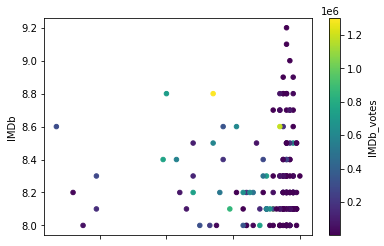

In [15]:
df_hot_film.plot.scatter(
    x='year', 
    y='IMDb', 
    c='IMDb_votes',
    colormap='viridis'
)

Biểu đồ cho thấy:
- Phim có số phim chất lượng IMDb >= 8 và được vote >= 7 sao được phân bố nhiều từ các năm 2012 đến 2020 
- Phần lớn số lượng người đánh giá cho chỉ số IMDb phân bố đề từ ở mức dưới 2500 đến trên 5000 người
- Chỉ số IMDb >= 8 tập trung nhiều từ khoảng (8, 9) và trung bình rơi vào 8.3 là nhiều, và 
- Các phim có điểm IMDb >= 9 rất ít và rơi vào các năm gần đây (các bộ phim được coi là kinh điển)

Xét về tần xuất của các thể loại phim trong danh sách này:

In [16]:
tmp_df = df_hot_film['genres'].apply(lambda x:x.split(', ')).explode().to_list()
freq = {}
for genre in tmp_df:
    if genre not in freq:
        freq[genre] = 0
    freq[genre] += 1
freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1], reverse=True)}
if 'Phim lẻ' in freq.keys():
    del freq['Phim lẻ']
freq

{'Phim thuyết minh': 67,
 'Phim chiếu rạp': 66,
 'Phim phiêu lưu': 60,
 'Phim hoạt hình': 56,
 'Phim hành động': 48,
 'Phim hài hước': 43,
 'Phim viễn tưởng': 41,
 'Phim gia đình': 27,
 'Phim tài liệu': 24,
 'Phim hình sự': 21,
 'Phim tâm lý': 18,
 'Phim Thể thao-Âm nhạc': 17,
 'Phim chính kịch - Drama': 17,
 'Phim chiến tranh': 17,
 'Phim tình cảm-Lãng mạn': 16,
 'Phim kinh dị': 15,
 'Phim hồi hộp-Gây cấn': 12,
 'Phim Bí ẩn-Siêu nhiên': 11,
 'Phim kinh điển': 11,
 'Phim võ thuật': 2}

- Rõ ràng, các bô phim thuyết minh, hành động, phiêu lưu và chiếu rạp chiếm ưu thế
- Rất nhiều lựa chọn cho thể loại thuyết minh, có thể đây là biểu hiện của việc yếu kém về Tiếng Anh.
- Các bộ phim hành động và phiêu lưu vẫn được lựa chọn nhiều, đúng như xu thể của giới trẻ hiện tại. Tuy nhiên phim chiếu rạp cũng nhiều, chứng tỏ số người coi lậu phim vẫn cao, họ không muốn phải bỏ tiền để ra rạp coi.
- Các phim hình sự, tài liệu, tâm lý, gia đinh, kinh điển đều được lựa chọn ở mức trung bình, đâu đó trong số giới trẻ vẫn còn quan tâm về chủ đề này bởi vì các chủ đề này phải thuộc diện người có nhiều cảm xúc và đầu óc nhạy bén để có thể thấu hiểu nội dung phim.
- Phim tình cảm - lãng mạn, thể thao - âm nhạc số lựa chọn ít có thể cũng do đa phần chỉ có nữ giới là thường xuyên coi.
- Đặc biệt ở đây có phim võ thuật ở cuối cùng, tuy nhiên, không phải vì số người chọn ít mà là do các bộ phim về võ thuật rất ít vì để làm ra một bộ phim về võ thuật tốn rất nhiều chi phí và thời gian.

In [17]:
genres = df.genres.apply(lambda x:x.split(', ')).explode().unique().tolist()
genres.remove('Phim thuyết minh')
genres.remove('Phim lẻ')

labels = np.zeros((len(df),len(genres)+1))
for i,g in df.genres.apply(lambda x:x.split(', ')).explode().apply(lambda x: genres.index(x) if x in genres else -1).items():
  labels[i][g] = 1
labels = np.delete(labels,-1,axis = 1)
df = pd.concat([df,pd.DataFrame(labels,columns =genres )], axis = 1)
df.drop(['genres'],inplace = True,axis = 1)
df.sample(3)

,IMDb,IMDb_votes,director,nations,duration,quality,resolution,language,company,vietnamese_name,...,Phim Thể thao-Âm nhạc,Phim tình cảm-Lãng mạn,Phim tài liệu,Phim hình sự,Phim kinh dị,Phim Bí ẩn-Siêu nhiên,Phim cổ trang,Phim chiến tranh,Phim thần thoại,Phim kinh điển
542,NaN,936.0,"John H. Lee,","Hàn Quốc,",120.0,Bản đẹp,HD 720p,Phụ đề Việt,Chưa rõ,Giữa Làn Lửa Đạn,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2174,5.2,2522.0,"Rodrigo Cortés,","Mỹ, Tây Ban Nha,",96.0,Bản đẹp,Full HD,Phụ đề việt + Thuyết minh,"Fickle Fish Films, Nostromo Pictures, Temple H...",Hành Lang Bí Ẩn,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3959,7.6,60747.0,"Wilson Yip,","Trung Quốc, Hồng Kông,",108.0,Bản đẹp,HD 720p,Phụ đề Việt,Henan Film & TV Production Group Henan Film St...,Diệp Vấn 2 - Tôn Sư Truyền Kỳ,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


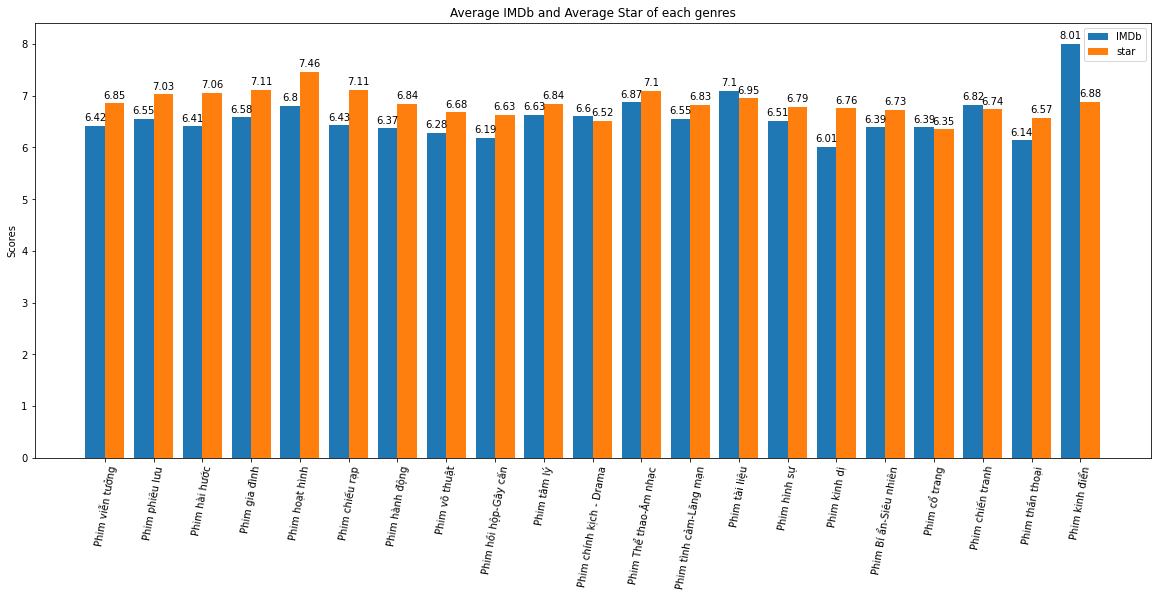

In [18]:

average_IMDb = np.round([df.IMDb[df[genre]==1].mean() for genre in genres], 2)
average_star = np.round([df.star[df[genre]==1].mean() for genre in genres], 2)



x = np.arange(len(genres))  # the label locations
width = 0.4 # the width of the bars

fig, ax = plt.subplots(figsize=(20,8))
rects1 = ax.bar(x - width/2, average_IMDb, width, label='IMDb')
rects2 = ax.bar(x + width/2, average_star, width, label='star')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Average IMDb and Average Star of each genres')
ax.set_xticks(x)
ax.set_xticklabels(genres,rotation=80)

ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical 
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)




Ta có thể thấy được là điểm số trung bình của IMDb và star được vote có xu hướng khá là trái ngược nhau: Những phim có điểm IMDb cao(>7) thì sẽ có xu hướng điểm star được vote từ trang web sẽ thấp hơn. Có lẽ vì lý IMDb được chấm theo chuyên môn của các nhà sản xuất, đạo diễn, kịch bản,.. vì đây là một chuẩn quốc tế do đó có lẽ sẽ có nhiều phim sẽ không được công chúng ưa chuộng.


## Câu hỏi 2: Xu hướng làm phim của các quốc gia hiện nay?

Mục đích trả lời câu hỏi này:
- Xác định thể loại phim sản xuất nhiều ở mỗi quốc gia từ đó hy vọng rằng có thể trả lời được câu hỏi sở thích xem phim của mỗi quốc gia là gì
- Thể hiện mối quan hệ giữa các điểm đánh giá phim ở mỗi quốc gia
- Liệu văn hóa của các quốc gia khác nhau thì ảnh hưởng đến phim của các quốc gia đó như thế nào
Để trả lời được câu hỏi này:
- Xác định danh sách các quốc gia đã sản xuất
- Xác định các giá trị thống kê từ các bộ phim theo quốc gia
- 

In [19]:
nations = np.unique([s.strip() for s in df.nations.apply(lambda x:x.split(',')).explode().unique().tolist()])
nations = np.delete(nations,np.where(nations==''))
len(nations)

94

Có tổng cộng 94 quốc gia sản xuất phim từ dữ liệu đã thu thập được từ trang web [phimmoizz](http://www.phimmoizz.net/)

In [20]:
nations

array(['Albania', 'Angola', 'Anh', 'Argentina', 'Austria', 'Azerbaijan',
       'Bahamas', 'Belgium', 'Bermuda', 'Bosnia and Herzegovina',
       'Brazil', 'Bulgaria', 'Burma (Myanmar)', 'Cambodia', 'Canada',
       'Cayman Islands', 'Chile', 'Colombia', 'Czech Republic',
       'Cộng hòa Séc', 'Denmark', 'Egypt', 'Finland', 'Germany', 'Ghana',
       'Greece', 'Haiti', 'Holy See (Vatican City)', 'Hong Kong',
       'Hungary', 'Hàn Quốc', 'Hồng Kông', 'Iceland', 'Indonesia', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Jordan', 'Kazakhstan', 'Kenya',
       'Laos', 'Latvia', 'Lithuania', 'Luxembourg', 'Macau', 'Macedonia',
       'Malaysia', 'Malta', 'Mexico', 'Morocco', 'Mỹ', 'Na Uy',
       'Netherlands', 'New Zealand', 'Nga', 'Nhật Bản', 'Nigeria',
       'Norway', 'Pakistan', 'Panama', 'Peru', 'Philippines', 'Pháp',
       'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Russia',
       'Senegal', 'Serbia', 'Singapore', 'Slovenia', 'Somalia',
       'South Africa', 'Sudan

In [21]:
def split_and_strip(x):
    return [s.strip() for s in x.split(',')]

labels = np.zeros((len(df),len(nations)+1))
for i,nation in df.nations.apply(split_and_strip).explode().apply(lambda x: np.where(nations==x)[0].item() if x in nations else -1).items():
  labels[i][nation] = 1
labels = np.delete(labels,-1,axis = 1)
nation_index_df = pd.DataFrame(labels,columns =nations )
nation_index_df.sample(3)

,Albania,Angola,Anh,Argentina,Austria,Azerbaijan,Bahamas,Belgium,Bermuda,Bosnia and Herzegovina,...,Tây Ban Nha,Ukraine,United Arab Emirates,Uruguay,Venezuela,Việt Nam,Úc,Đài Loan,Đức,Ấn Độ
891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


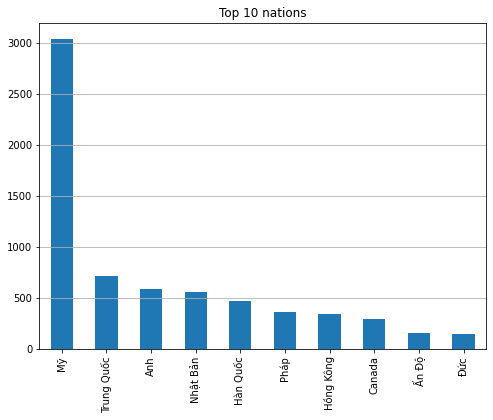

In [22]:
f, ax = plt.subplots(figsize=(8,6))
nation_index_df.sum(axis=0).sort_values(ascending=False).head(10).plot(kind='bar')
plt.grid(axis='y')
plt.title("Top 10 nations");


Không quá ngạc nhiên khi Mỹ đứng đầu danh sách nhưng thực sự Mỹ sản xuất số lượng phim vượt trội so với phần còn lại. Theo sau là Trung Quốc, Anh, Nhật Bản.